In [3]:
# modules imports
import numpy as np
from spectral_cube import SpectralCube as sc
import astropy.io.fits as fits
import astropy.io
from astropy.wcs import WCS
import os
import sys
import math
import copy
import time
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import six

In [4]:
# set default formats
font = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font + ':italic'
plt.rcParams['mathtext.bf'] = font + ':bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'



In [5]:
path_12CO = "/Users/r.yamada/science/NGC2023/NGC2023_12CO_Tmb.fits"
path_13CO = "/Users/r.yamada/science/NGC2023/NGC2023_13CO_Tmb.fits"
hdu_12CO = fits.open(path_12CO)[0]
hdu_13CO = fits.open(path_13CO)[0]

header_12CO = hdu_12CO.header
data_12CO = hdu_12CO.data

header_13CO = hdu_13CO.header
data_13CO = hdu_13CO.data

header_12CO["CTYPE3"] = "VELO-LSR"
header_12CO["CTYPE1"] = "GLON    "
header_12CO["CTYPE2"] = "GLAT    "
header_12CO["BUNIT"] = "K       "
header_12CO["BMAJ"] = 0.0038888888888888888

header_13CO["CTYPE3"] = "VELO-LSR"
header_13CO["CTYPE1"] = "GLON    "
header_13CO["CTYPE2"] = "GLAT    "
header_13CO["BUNIT"] = "K       "
header_13CO["BMAJ"] = 0.0038888888888888888



#wcs = WCS(path_12CO)
hdu_fixed_12CO = fits.PrimaryHDU(data_12CO,header_12CO)
hdu_fixed_13CO = fits.PrimaryHDU(data_13CO,header_13CO)

In [6]:
wcs_12CO = WCS(hdu_fixed_12CO)
cube_12CO = sc.read(hdu_fixed_12CO)
wcs_13CO = WCS(hdu_fixed_13CO)
cube_13CO = sc.read(hdu_fixed_13CO)
print(cube_12CO)

SpectralCube with shape=(667, 201, 193) and unit=K:
 n_x:    193  type_x: GLON      unit_x: deg    range:   206.661399 deg:  207.061399 deg
 n_y:    201  type_y: GLAT      unit_y: deg    range:   -16.724483 deg:  -16.307817 deg
 n_s:    667  type_s: VOPT      unit_s: m / s  range:   -99850.000 m / s:   99950.000 m / s


In [7]:
from astropy import units as u
subcube_12CO = cube_12CO.spectral_slab(7.9 * u.km / u.s, 13.3 * u.km / u.s) 
subcube_12CO = subcube_12CO.with_spectral_unit(u.km / u.s)
subcube_13CO = cube_13CO.spectral_slab(7.9 * u.km / u.s, 13.3 * u.km / u.s) 
subcube_13CO = subcube_13CO.with_spectral_unit(u.km / u.s)

In [8]:
moment_0_12CO = subcube_12CO.moment(order=0) 
moment_0_13CO = subcube_13CO.moment(order=0) 

In [9]:
def scalebarlength(distance, pc):
    _distance = distance*3.086e+16 #distance pc-m conversion
    _pc = pc*3.086e+16
    angle = numpy.arcsin((1/2)*_pc/_distance)
    return angle

a = scalebarlength(410, 1)

In [10]:
#annotation config
l = [206.8512475766038, 206.8642]
b = [-16.5375049312719, -16.6074]

x_tempo_12CO, y_tempo_12CO, v = wcs_12CO.wcs_world2pix(l, b, 0, 0)
x_tempo_13CO, y_tempo_13CO, v = wcs_13CO.wcs_world2pix(l, b, 0, 0)

#print(x_tempo)

In [9]:
fiv_sigma_12CO = 0.88*np.sqrt(20)*0.3
fiv_sigma_13CO = 0.37*np.sqrt(20)*0.3

print(fiv_sigma_12CO, fiv_sigma_13CO)

1.180643892119889 0.4964070910049533


In [10]:
# read annotation

anno = open('bstar2.txt')
anno_list = anno.read()
#anno_list = np.array(anno_list)
#print(anno_list)
l = anno_list.split('\n')
#all_list = np.array(lines1)

#ann_file = np.split(all_list,10)
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]
result = list(split_list(l, 1))


In [15]:
import pandas as pd
d = 'bstar2.txt'
df = pd.read_table(d, sep=",")
glon = df['B'].tolist()
glat = df['C'].tolist()
glon_ = glon
glat_ = glat
#df.iloc[:,1].tolist()

In [12]:
0.58474739*15

8.77121085

[100.87249891  94.65533568]


/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:225: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)


INFO: Auto-setting resolution to 24.2956 dpi [aplpy.core]


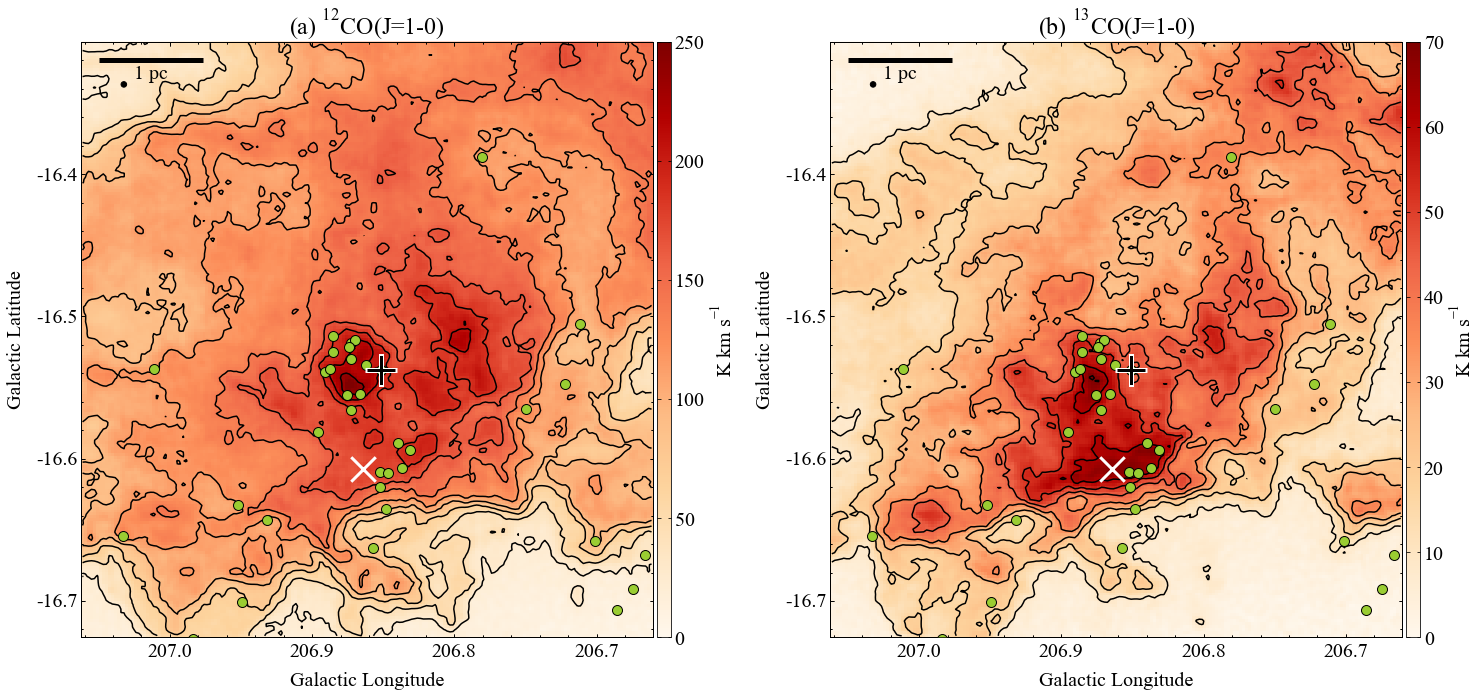

In [16]:
import aplpy  

fiv_sigma_13CO = 0.58474739
fiv_sigma_12CO = 1.5429471

l = [206.8512475766038, 206.8642]
b = [-16.5375049312719, -16.6074]

import matplotlib.colors as colors

x_tempo, y_tempo, v = wcs_12CO.wcs_world2pix(l, b, 0, 0)

print(x_tempo)

a = scalebarlength(410, 1)

#moment_0.hdu.header.set('BMAJ    ', '0.0038888888888888888')
#print(moment_0.hdu.header)
fig = plt.figure(figsize=(24, 12))
'''
f = aplpy.FITSFigure(moment_0.hdu, subplot=(1, 2, 1), figure = fig) 
f.show_colorscale(cmap='jet', vmin=0) 
f.add_colorbar()
f.set_nan_color('gray')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.scalebar.set_corner('top right')
f.add_beam()
f.beam.set_corner('top left')
f.beam.set_color('black')
'''
plt.subplots_adjust(wspace=0.27, hspace=0.6)
f = aplpy.FITSFigure(moment_0_12CO.hdu, subplot=(1, 2, 1), figure=fig)
f.show_colorscale(cmap='OrRd', vmin=0, vmax=250)  
f.set_title('(a) $^{12}$CO(J=1-0)')
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.scalebar.set_corner('top left')
f.scalebar.set_linewidth(5)
f.add_beam(borderpad=1.5)
f.beam.set_corner('top left')
f.beam.set_color('black')
#f.add_label(0.8, 0.1, 'HPBW', relative=True, color='white', size=13, horizontalalignment='left', verticalalignment='top')
#f.show_contour(levels=[10.,11.], colors='black')
f.colorbar.set_axis_label_text("K km s$^{-1}$")
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[0], b[0], edgecolor='white', facecolor='white', marker='+', s=1000, alpha=1, linewidth=5, zorder=9)
#f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=600, alpha=1, linewidth=3, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=600, alpha=1, linewidth=3 ,zorder=10)
for glon, glat in zip(glon,glat):
    f.show_markers(glon, glat, edgecolor='black', facecolor='yellowgreen', marker='.', s=400, alpha=1, linewidth=1, zorder=5)

f.scalebar.set_label('1 pc')
f.show_contour(levels=numpy.linspace(1,10,10)*fiv_sigma_12CO*15, colors='black')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.ticks.set_color('black')


f = aplpy.FITSFigure(moment_0_13CO.hdu, subplot=(1, 2, 2), figure = fig)  
f.show_colorscale(cmap='OrRd', vmin=0, vmax=70)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.colorbar.set_axis_label_text("K km s$^{-1}$")
f.scalebar.set_linewidth(5)
f.scalebar.set_corner('top left')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.add_beam(borderpad=1.5)
f.set_title('(b) $^{13}$CO(J=1-0)')
f.beam.set_corner('top left')
f.beam.set_color('black')
#f.show_contour(data=moment_1.hdu.data, levels=[10.,11.], colors='black')
f.show_contour(levels=numpy.linspace(1,10,10)*fiv_sigma_13CO*15, colors='black', linewidth=1)
#f.recenter(206.86666, -16.55, width=0.45, height=0.42)
f.scalebar.set_label('1 pc')
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[0], b[0], edgecolor='white', facecolor='white', marker='+', s=1000, alpha=1, linewidth=5, zorder=9)
#f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=600, alpha=1, linewidth=3, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=600, alpha=1, linewidth=3 ,zorder=10)
f.set_theme('Publication')
for i, j in zip(glon_,glat_):
    f.show_markers(i, j, edgecolor='black', facecolor='yellowgreen', marker='.', s=400, alpha=1, linewidth=1, zorder=5)
f.ticks.set_color('black')
f.savefig('integrated_intensity.eps')  

In [56]:
subcube_13CO = cube_12CO.spectral_slab(10.5 * u.km / u.s, 13.0 * u.km / u.s) 
subcube_13CO = subcube_12CO.with_spectral_unit(u.km / u.s)

moment_0_13CO = subcube_13CO.moment(order=0) 

In [17]:
d = 'bstar2.txt'
df = pd.read_table(d, sep=",")
glon = df['B'].tolist()
glat = df['C'].tolist()
glon_ = glon
glat_ = glat

INFO: Auto-setting resolution to 24.2956 dpi [aplpy.core]


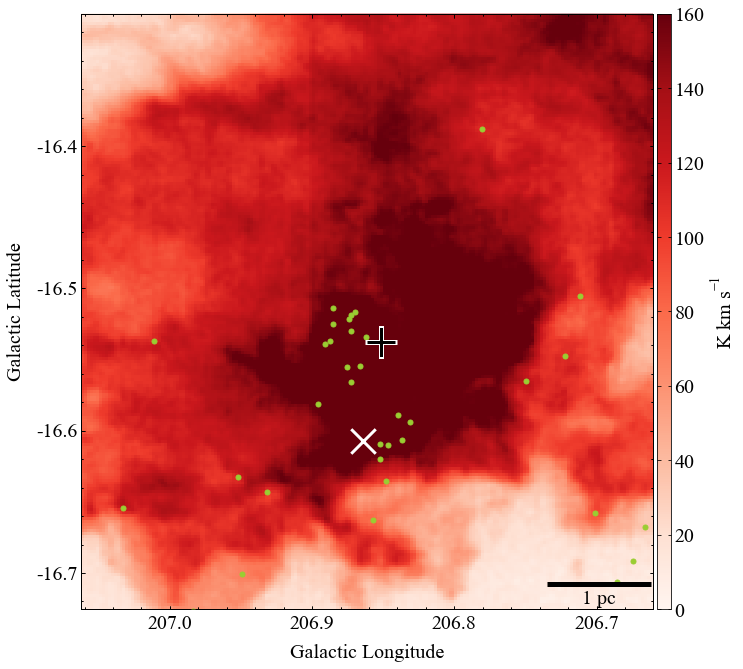

In [18]:
fig = plt.figure(figsize=(24, 12))
plt.subplots_adjust(wspace=0.27, hspace=0.6)
f = aplpy.FITSFigure(moment_0_13CO.hdu, subplot=(1, 2, 1), figure=fig)
f.show_colorscale(cmap='Reds', vmin=0,vmax=160)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'black',pad=-0.3)
f.scalebar.set_corner('bottom right')
f.scalebar.set_linewidth(5)
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
#f.show_contour(levels=[10.,11.], colors='black')
f.colorbar.set_axis_label_text("K km s$^{-1}$")
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[0], b[0], edgecolor='white', facecolor='white', marker='+', s=1000, alpha=1, linewidth=5, zorder=9)
#f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=600, alpha=1, linewidth=3, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=600, alpha=1, linewidth=3 ,zorder=10)
for glon, glat in zip(glon,glat):
    f.show_markers(glon, glat, edgecolor='yellowgreen', facecolor='yellowgreen', marker='.', s=100, alpha=1, linewidth=1, zorder=5)

f.scalebar.set_label('1 pc')
#f.show_contour(levels=numpy.linspace(1,10,10)*fiv_sigma_12CO*20+25*fiv_sigma_12CO, colors='black')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.ticks.set_color('black')
f.savefig('redcloud.eps') 

In [19]:
print(header_12CO)

SIMPLE  =                    T / Written by IDL:  Wed May  8 23:06:28 2019      BITPIX  =                  -32                                                  NAXIS   =                    3                                                  NAXIS1  =                  193                                                  NAXIS2  =                  201                                                  NAXIS3  =                  667                                                  OBJECT  = 'ori23             '                                                  TELESCOP= 'NRO45M            '                                                  INSTRUME= 'TMULTH            '                                                  OBSERVER= 'cu128hs           '                                                  DATE-OBS= '2018-01-14        '                                                  BSCALE  =                    1 /                                                BZERO   =                    0 /        

In [105]:
print(x_tempo)
print(y_tempo)

[100.87249891  94.65533568]
[89.74963299 56.2       ]


In [117]:
numpy.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])